Top publishers with max global sales in millions 
 Publisher
Nintendo                        1788.81
Electronic Arts                 1116.96
Activision                       731.16
Sony Computer Entertainment      606.48
Ubisoft                          471.61
Take-Two Interactive             403.82
THQ                              338.44
Konami Digital Entertainment     282.39
Sega                             270.35
Namco Bandai Games               254.62
Name: Global_Sales, dtype: float64


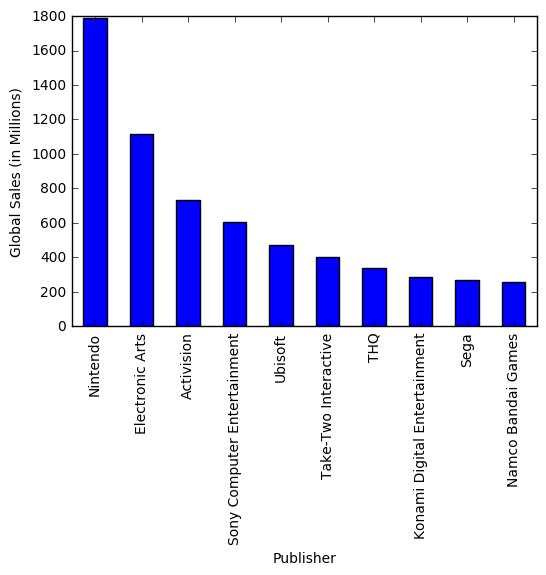

In [192]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# reading dataset, converting user scores to numeric, scaling critic scores to 1-10
df = pd.read_csv('dataset/games.csv', encoding = "ISO-8859-1")
pd.to_numeric(df.User_Score)
df['Critic_Score']=df['Critic_Score'].apply(lambda x: x/10)

# Getting top publishers according to top global sales
res = df.groupby('Publisher').Global_Sales.sum().sort_values(ascending=False).head(10)
print('Top publishers with max global sales in millions \n', res)
ax = res.plot(kind='bar')
ax.set_ylabel('Global Sales (in Millions)')

Top publishers according to number of releases 
 Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
THQ                              715
Nintendo                         706
Sony Computer Entertainment      687
Sega                             638
Take-Two Interactive             422
Name: Name, dtype: int64


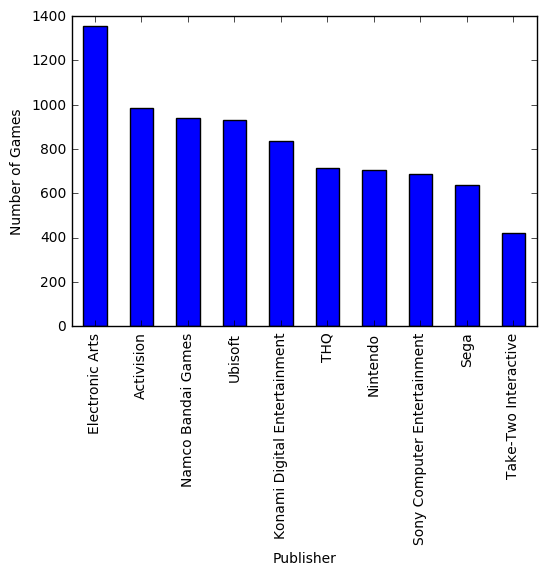

In [193]:
# getting top publishers according to number of game releases
res=df.groupby('Publisher').Name.count().sort_values(ascending=False).head(10)
print('Top publishers according to number of releases \n', res)
ax = res.plot(kind='bar')
ax.set_ylabel('Number of Games')

In [194]:
# Top genres according to global sales
res=df.groupby('Genre')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values('Global_Sales',ascending=False)
print('Genre popularity according to sales in different regions \n', res)

Genre popularity according to sales in different regions 
               Global_Sales  NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                                
Action             1745.27    879.01    519.13    161.44       184.60
Sports             1332.00    684.43    376.79    135.54       134.51
Shooter            1052.94    592.24    317.34     38.76       104.11
Role-Playing        934.40    330.81    188.71    355.46        59.63
Platform            828.08    445.50    200.35    130.83        51.09
Misc                803.18    407.27    212.74    108.11        74.39
Racing              728.90    359.35    236.51     56.71        76.10
Fighting            447.48    223.36    100.33     87.48        36.36
Simulation          390.42    182.19    113.52     63.80        30.75
Puzzle              243.02    122.87     50.01     57.31        12.38
Adventure           237.69    105.26     63.54     52.30        16.49
Strategy            174.50     

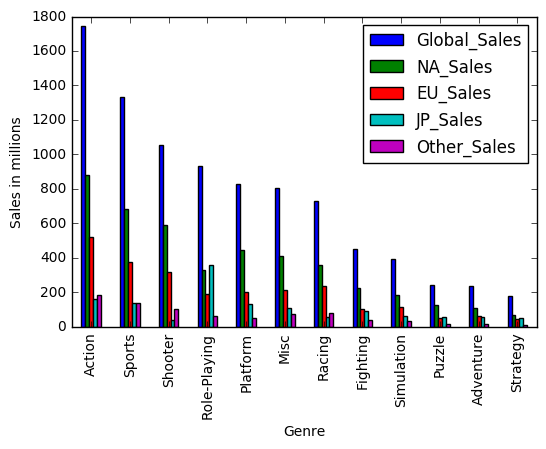

In [195]:
ax = res.plot(kind='bar')
ax.set_ylabel('Sales in millions')

(0, 10)

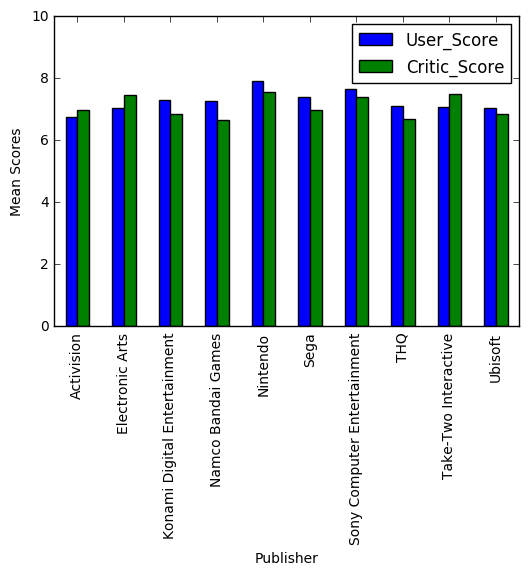

In [196]:
# mean user and critic scores for our top 10 publishers
publishers=['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ','Konami Digital Entertainment', 'Sega', 'Namco Bandai Games']
res=df[df['Publisher'].isin(publishers)].groupby('Publisher')[['User_Score', 'Critic_Score']].mean()
ax = res.plot(kind='bar')
ax.set_ylabel('Mean Scores')
ax.set_ylim(0,10)

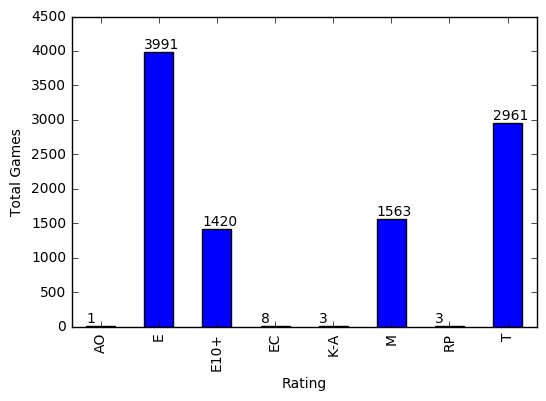

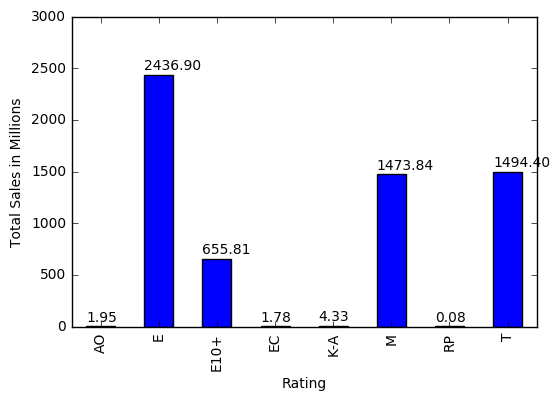

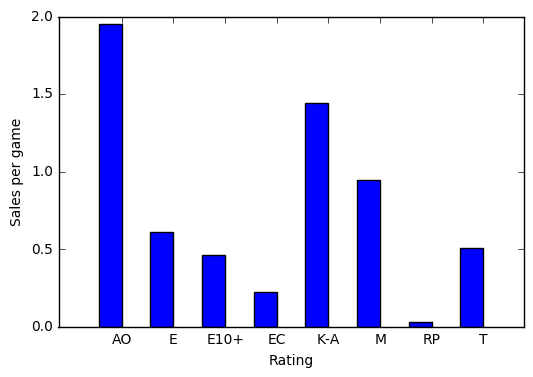

In [197]:
# finding game ratings distribution 
resTG=df.groupby('Rating')['Global_Sales'].count()
ax=resTG.plot(kind='bar')
ax.set_ylabel('Total Games')
ax.set_ylim(0, 4500)
for val in ax.patches:
    ax.annotate(int(val.get_height()), (val.get_x(), val.get_height()+50))
plt.show()
    
# game ratings according to sales
resGS=df.groupby('Rating')['Global_Sales'].sum()
ax2=resGS.plot(kind='bar')
ax2.set_ylabel('Total Sales in Millions')
ax2.set_ylim(0, 3000)
for val in ax2.patches:
    ax2.annotate("{0:.2f}".format((val.get_height())), (val.get_x(), val.get_height()+50))
plt.show()

# finding sales per game ratio for different ratings
ratios=[]
N=8
i=0
width=0.45
index = np.arange(N)
while (i<len(resTG)):
    ratios.append(resGS[i]/resTG[i])
    i+=1
    
# plotting sales per game ratio
fig3, ax3= plt.subplots()
ax3.bar(index, ratios, width, align='center')
ax3.set_xticks((index+width/ 2))
ax3.set_xticklabels(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'])
ax3.set_xlabel('Rating')
ax3.set_ylabel('Sales per game')
plt.show()